# Task
Load the Iris dataset from "/content/IRIS.csv", split it into 80/20 training and testing sets, train a `LogisticRegression` model, evaluate its accuracy, and visualize the decision boundaries.

## Load the iris dataset

### Subtask:
Load the dataset from "/content/IRIS.csv" into a dataframe.


**Reasoning**:
Import the pandas library and load the dataset into a DataFrame.



In [15]:
import pandas as pd

df = pd.read_csv('/content/IRIS.csv')

## Split the data

### Subtask:
Split the dataset into training and testing sets using an 80/20 split.


**Reasoning**:
Split the dataset into training and testing sets using an 80/20 split.



In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train a linear regression model

### Subtask:
Train a `LogisticRegression` model on the training data.


**Reasoning**:
Train a Logistic Regression model on the training data as instructed.



In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Evaluate the model

### Subtask:
Calculate and print the accuracy of the trained model on the test data.


**Reasoning**:
Calculate and print the accuracy of the trained model on the test data.



## Visualize decision boundaries

### Subtask:
Plot the decision boundaries of the trained model.


**Reasoning**:
To visualize the decision boundaries in 2D, I will select two features, 'petal_length' and 'petal_width', as these are often the most discriminative features for the Iris dataset. I will then create a meshgrid based on the ranges of these two features in the dataset and use the trained logistic regression model to predict the class for each point in the meshgrid. Finally, I will plot the contour lines of the predictions along with the actual training and test data points to visualize the decision boundaries.



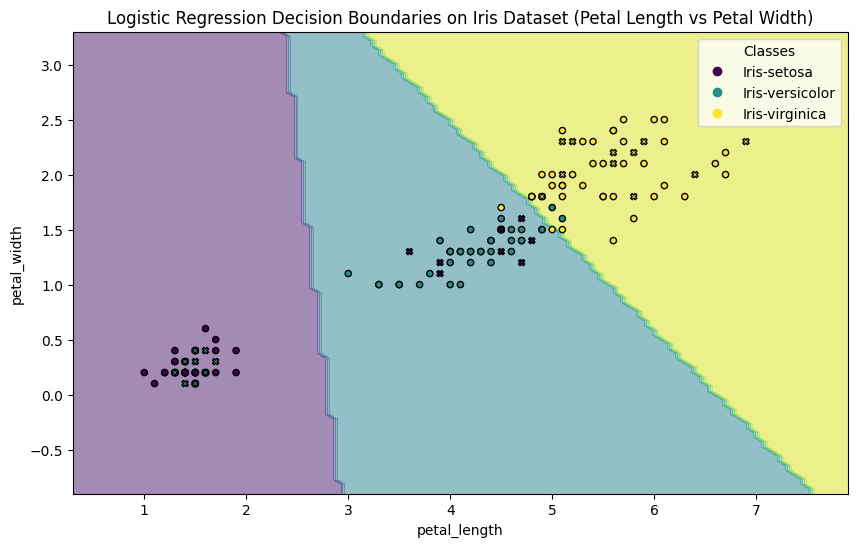

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

# Select two features for visualization
X_train_2d = X_train[['petal_length', 'petal_width']]
X_test_2d = X_test[['petal_length', 'petal_width']]

# Train a model on the 2D data for visualization purposes
model_2d = LogisticRegression()
model_2d.fit(X_train_2d, y_train)

# Plot the decision boundary
fig, ax = plt.subplots(figsize=(10, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    model_2d, X_test_2d, response_method="predict", ax=ax,
    xlabel='petal_length', ylabel='petal_width',
    alpha=0.5
)

# Plot training and test points
scatter_train = ax.scatter(X_train_2d['petal_length'], X_train_2d['petal_width'], c=y_train.factorize()[0], edgecolors='k', s=20, label='Training data')
scatter_test = ax.scatter(X_test_2d['petal_length'], X_test_2d['petal_width'], c=y_test.factorize()[0], edgecolors='k', s=20, marker='X', label='Test data')

# Add legend and title
handles, labels = scatter_train.legend_elements()
handles_test, labels_test = scatter_test.legend_elements()
legend_labels = np.unique(y_train) # Get unique string labels from y_train
ax.legend(handles, legend_labels, title="Classes")
ax.set_title("Logistic Regression Decision Boundaries on Iris Dataset (Petal Length vs Petal Width)")

plt.show()

In [19]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Model Accuracy: 100.00%
